# K-MEANS 

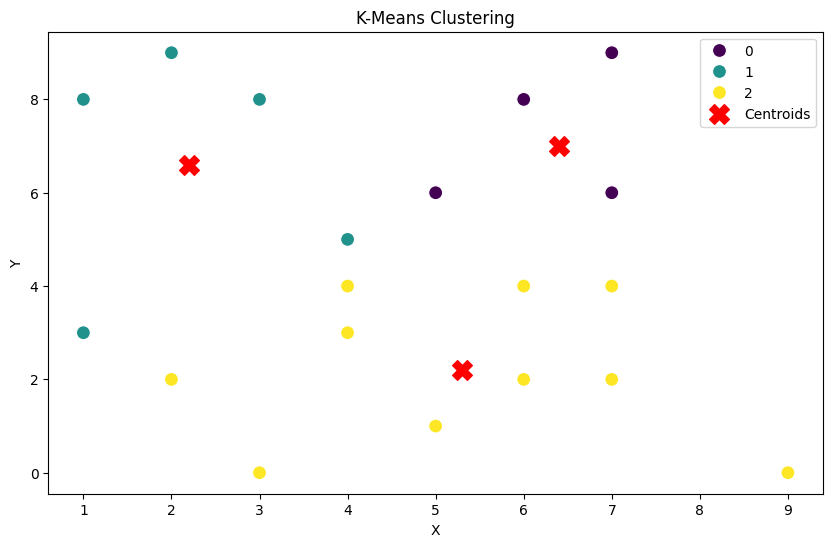

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data points
np.random.seed(42)  # Set seed for reproducibility
num_points = 20
data = {
    'x': np.random.randint(0, 10, num_points),
    'y': np.random.randint(0, 10, num_points)
}
df = pd.DataFrame(data)

# Select three random centroids
k = 3
centroids = {
    'x': np.random.randint(0, 10, k),
    'y': np.random.randint(0, 10, k)
}
centroids_df = pd.DataFrame(centroids)

def euclidean(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point2[i] - point1[i]) ** 2
    return np.sqrt(distance)

def update_centroids(df, cluster_labels, k):
    new_centroids = {'x': [], 'y': []}
    for cluster in range(k):
        cluster_points = df[df['Clusters'] == cluster]
        new_centroids['x'].append(cluster_points['x'].mean())
        new_centroids['y'].append(cluster_points['y'].mean())
    return pd.DataFrame(new_centroids)

for m in range(5):
    cluster = list(np.zeros(len(df)))
    
    for i in range(len(df)):
        distances = []
        for j in range(k):
            distances.append(euclidean((df.x[i], df.y[i]), (centroids_df['x'][j], centroids_df['y'][j])))
        cluster[i] = distances.index(min(distances))
    
    df['Clusters'] = cluster

    # Update centroids based on current clusters
    centroids_df = update_centroids(df, cluster, k)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue='Clusters', palette='viridis', data=df, s=100)
plt.scatter(centroids_df['x'], centroids_df['y'], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# K-MEANS LIB

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('KMeansClustering.csv', index_col='Company')
df

,Clients,Rate of Return,Sales,Years,Cluster
Company,,,,,
A,150,15.4,50400200,18,1
B,144,11.3,42100650,15,2
C,120,9.9,39440420,12,2
D,110,12.5,36500520,16,2
E,100,9.7,40650005,10,2
F,99,15.2,45665230,12,1
G,56,9.2,25978080,8,3
H,120,13.1,37900800,12,2
I,122,12.4,42560000,13,2


In [10]:
scaler = StandardScaler()
df[['Clients_t', 'Rate of Return_t', 'Sales_t', 'Years_t', 'Cluster_t']] = scaler.fit_transform(df[['Clients', 'Rate of Return', 'Sales', 'Years', 'Cluster']])
# df

c:\Users\Zeeshan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Zeeshan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Zeeshan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Zeeshan\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

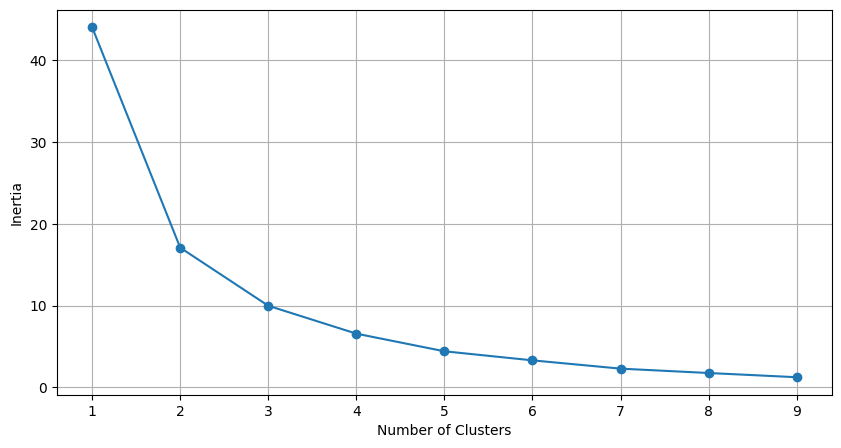

In [14]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

optimise_k_means(df[['Rate of Return_t', 'Sales_t']], 10)

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Clients_t', 'Rate of Return_t', 'Sales_t', 'Years_t', 'Cluster_t']])
df['kmeans_3'] = kmeans.labels_
# df

c:\Users\Zeeshan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


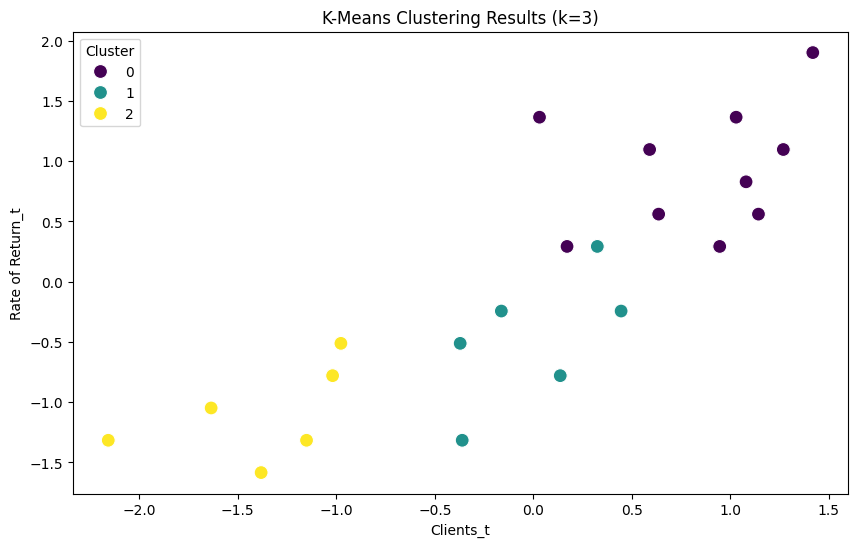

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales_t', y='Years_t', hue='kmeans_3', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering Results (k=3)')
plt.xlabel('Clients_t')
plt.ylabel('Rate of Return_t')
plt.legend(title='Cluster')
plt.show()

# LINEAR REGRESSION

MSE: 305.7719958301902
Accuracy: 0.9253717934621964


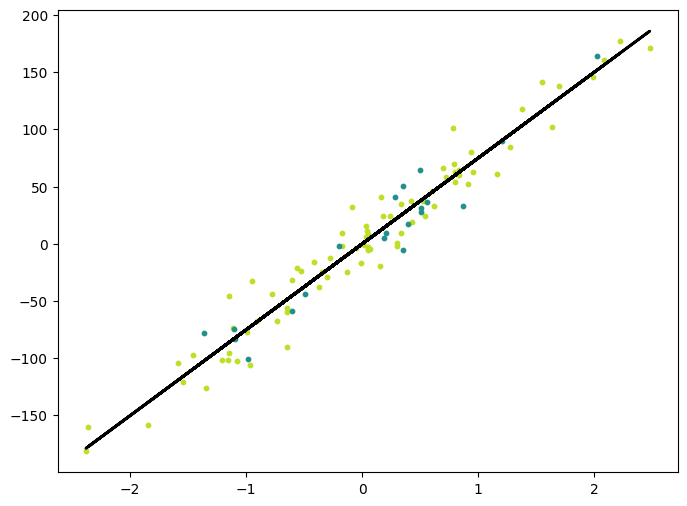

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated



def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=4
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

accu = r2_score(y_test, predictions)
print("Accuracy:", accu)

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()

# LINEAR REGRESSION LIB

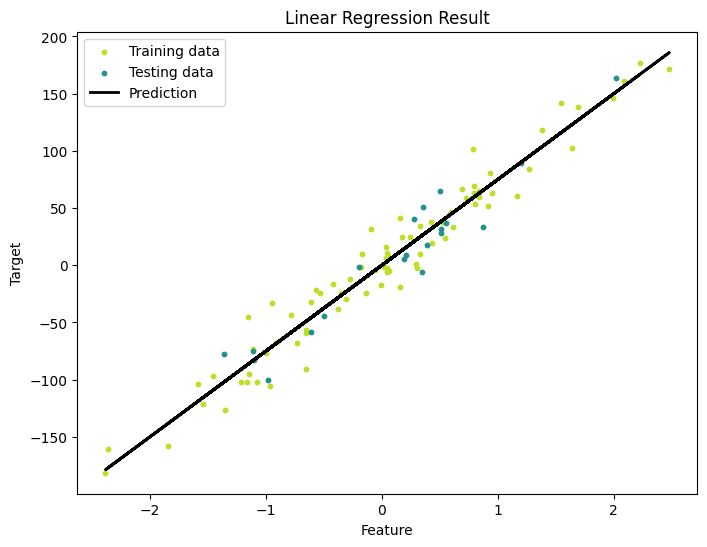

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate the dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generate line for prediction
y_pred_line = model.predict(X)

# Plotting the results
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10, label='Training data')
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10, label='Testing data')
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.title("Linear Regression Result")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


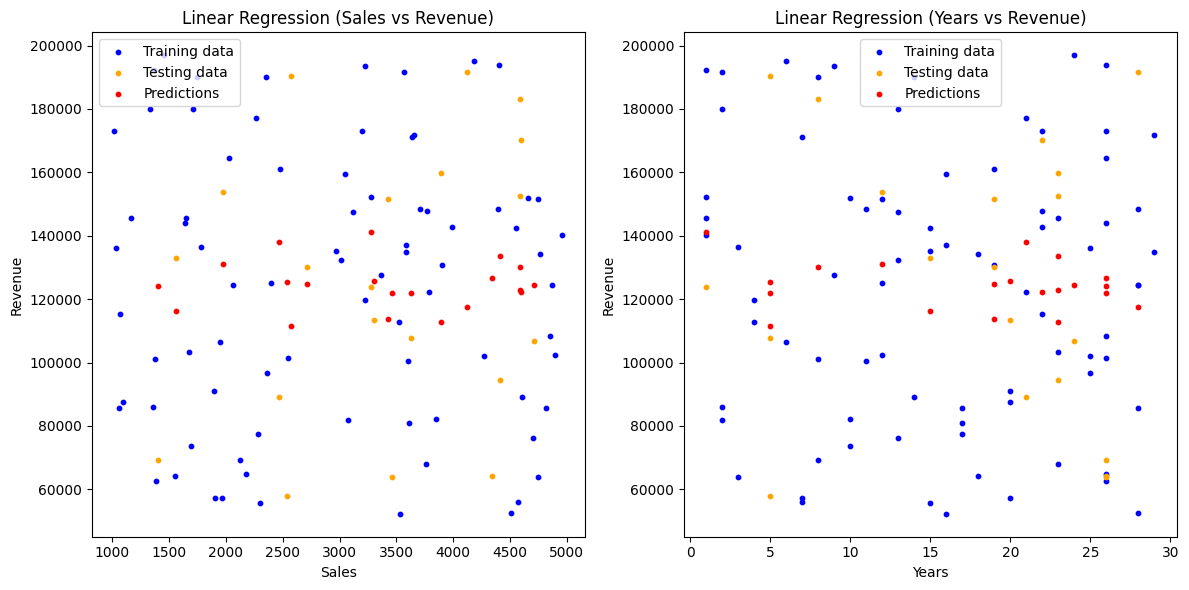

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate the dataset
np.random.seed(42)
num_samples = 100

data = {
    'Clients': np.random.randint(1, 100, num_samples),
    'Rate of Return': np.random.uniform(0, 20, num_samples),
    'Sales': np.random.uniform(1000, 5000, num_samples),
    'Years': np.random.randint(1, 30, num_samples),
    'Revenue': np.random.uniform(50000, 200000, num_samples)
}

df = pd.DataFrame(data)

# Define features and target
X = df[['Clients', 'Rate of Return', 'Sales', 'Years']]
y = df['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plotting the results for one of the features against the target for visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train['Sales'], y_train, color='blue', s=10, label='Training data')
plt.scatter(X_test['Sales'], y_test, color='orange', s=10, label='Testing data')
plt.scatter(X_test['Sales'], y_pred_test, color='red', s=10, label='Predictions')
plt.title('Linear Regression (Sales vs Revenue)')
plt.xlabel('Sales')
plt.ylabel('Revenue')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train['Years'], y_train, color='blue', s=10, label='Training data')
plt.scatter(X_test['Years'], y_test, color='orange', s=10, label='Testing data')
plt.scatter(X_test['Years'], y_pred_test, color='red', s=10, label='Predictions')
plt.title('Linear Regression (Years vs Revenue)')
plt.xlabel('Years')
plt.ylabel('Revenue')
plt.legend()

plt.tight_layout()
plt.show()
